<a href="https://colab.research.google.com/github/Prachi-Vaidya/iss-tracking/blob/main/issTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

In [ ]:
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'},
  {'craft': 'ISS', 'name': 'Nikolai Chub'},
  {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
  {'craft': 'ISS', 'name': 'Matthew Dominick'},
  {'craft': 'ISS', 'name': 'Michael Barratt'},
  {'craft': 'ISS', 'name': 'Jeanette Epps'},
  {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
  {'craft': 'ISS', 'name': 'Butch Wilmore'},
  {'craft': 'ISS', 'name': 'Sunita Williams'},
  {'craft': 'Tiangong', 'name': 'Li Guangsu'},
  {'craft': 'Tiangong', 'name': 'Li Cong'},
  {'craft': 'Tiangong', 'name': 'Ye Guangfu'}],
 'number': 12,
 'message': 'success'}

In [ ]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)

space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']


{'timestamp': 1718700231, 'iss_position': {'longitude': '-73.6578', 'latitude': '18.0376'}, 'message': 'success'}


1718700231

In [ ]:
!pip install Basemap

Text(0.5, 1.0, 'International Space Station Location')

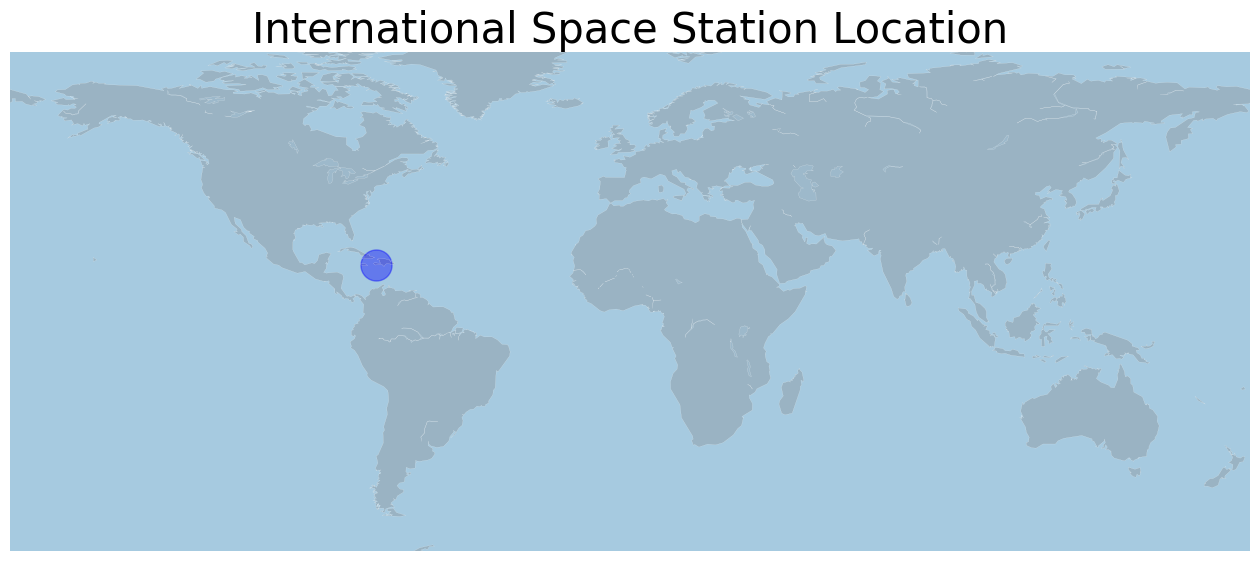

In [ ]:
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


m.scatter(float(space_station_location['iss_position']['longitude']),
          float(space_station_location['iss_position']['latitude']),
          s=500, alpha=0.4,color='blue')


plt.title('International Space Station Location' , fontsize=30)

In [ ]:
import datetime
date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
date_to_print

'20240618092416'

In [ ]:
import time
starttime=time.time()
space_station_data = []
while True:
      r = requests.get(url='http://api.open-notify.org/iss-now.json')
      space_station_location = (r.json())
      print(space_station_location)

      space_station_data.append([space_station_location['timestamp'],
                              space_station_location['iss_position']['latitude'],
                              space_station_location['iss_position']['longitude']
                              ])

        # dump copy to file
      tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
      tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)

        # safety break
      if len(space_station_data) > 18000:
          break

        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
      time.sleep(60.0 - ((time.time() - starttime) % 60.0))

{'timestamp': 1718702667, 'iss_position': {'longitude': '81.4984', 'latitude': '-0.5273'}, 'message': 'success'}
{'timestamp': 1718702720, 'iss_position': {'longitude': '83.4018', 'latitude': '-3.2100'}, 'message': 'success'}
{'timestamp': 1718702779, 'iss_position': {'longitude': '85.5520', 'latitude': '-6.2159'}, 'message': 'success'}
{'timestamp': 1718702839, 'iss_position': {'longitude': '87.7483', 'latitude': '-9.2359'}, 'message': 'success'}
{'timestamp': 1718702900, 'iss_position': {'longitude': '90.0245', 'latitude': '-12.2887'}, 'message': 'success'}
{'timestamp': 1718702967, 'iss_position': {'longitude': '92.5544', 'latitude': '-15.5645'}, 'message': 'success'}
{'timestamp': 1718703020, 'iss_position': {'longitude': '94.6504', 'latitude': '-18.1687'}, 'message': 'success'}
{'timestamp': 1718703079, 'iss_position': {'longitude': '97.0875', 'latitude': '-21.0581'}, 'message': 'success'}
{'timestamp': 1718703142, 'iss_position': {'longitude': '99.7833', 'latitude': '-24.0691'}, 

KeyboardInterrupt: 

In [ ]:
# load historical data
iss_flight_record = pd.read_csv('ISS_location_20240618092416.csv')
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']]

# add teh date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)

iss_flight_record.head()



,timestamp,latitude,longitude,date,index
0,1718702667,-0.5273,81.4984,2024-06-18 09:24:27,1
1,1718702720,-3.2100,83.4018,2024-06-18 09:25:20,2
2,1718702779,-6.2159,85.5520,2024-06-18 09:26:19,3
3,1718702839,-9.2359,87.7483,2024-06-18 09:27:19,4
4,1718702900,-12.2887,90.0245,2024-06-18 09:28:20,5


In [ ]:
iss_flight_record.shape

(15, 5)

Text(0.5, 1.0, 'International Space Station Location')

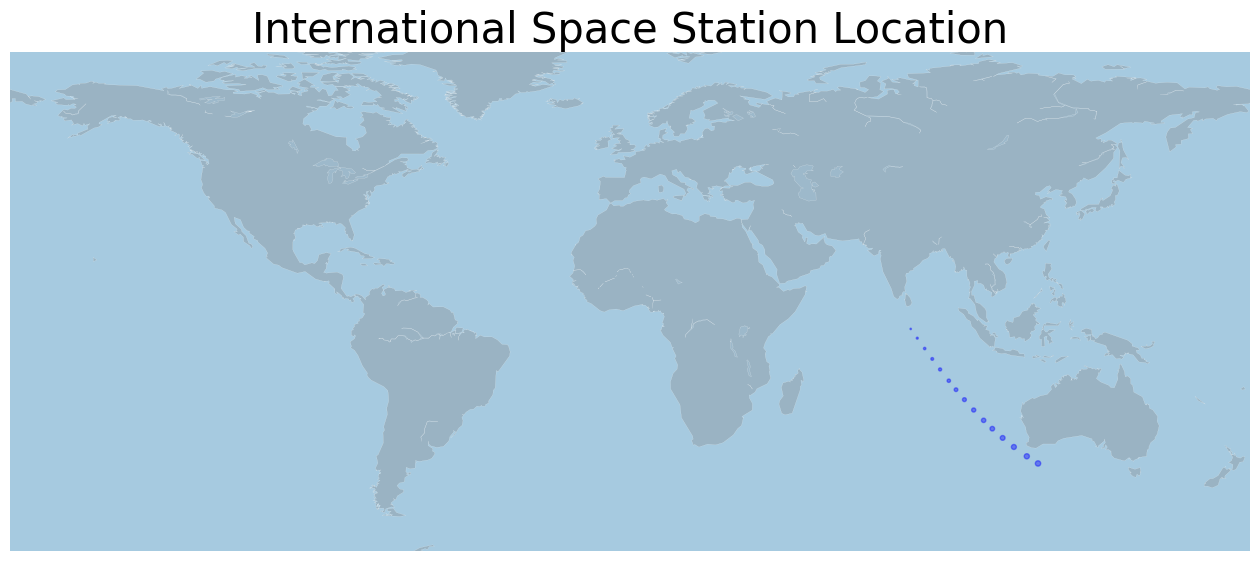

In [ ]:
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")



m.scatter(iss_flight_record['longitude'],
          iss_flight_record['latitude'],
          s=iss_flight_record['index'] , alpha=0.4,color='blue')


plt.title('International Space Station Location' , fontsize=30)

In [ ]:
tmp_df = iss_flight_record.tail(10)
tmp_df


,timestamp,latitude,longitude,date,index
5,1718702967,-15.5645,92.5544,2024-06-18 09:29:27,6
6,1718703020,-18.1687,94.6504,2024-06-18 09:30:20,7
7,1718703079,-21.0581,97.0875,2024-06-18 09:31:19,8
8,1718703142,-24.0691,99.7833,2024-06-18 09:32:22,9
9,1718703206,-27.0665,102.6664,2024-06-18 09:33:26,10
10,1718703259,-29.4933,105.1825,2024-06-18 09:34:19,11
11,1718703320,-32.1691,108.1922,2024-06-18 09:35:20,12
12,1718703381,-34.7986,111.4517,2024-06-18 09:36:21,13
13,1718703446,-37.5014,115.2048,2024-06-18 09:37:26,14
14,1718703499,-39.5819,118.4556,2024-06-18 09:38:19,15


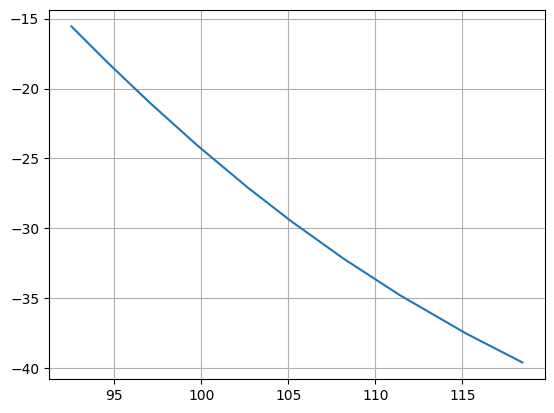

In [ ]:
plt.plot(tmp_df['longitude'], tmp_df['latitude'])
plt.grid()

predicting path using Linear Regression
The regression equation is the equation of the line-of-best-fit from our regression model. The formula is common and can be seen in most statistic books:

y^ = a + bx

“y” is the dependent variable, or what we're trying to predict, in our case, a new latitude point, a is the intercept, “β” is the slope of the line and “x” is the independent variable.

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  69.33890747674332
slope:  -0.9307629820068422


In [ ]:
predicted_latitude = np.ceil(slope * 80 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: -5.0


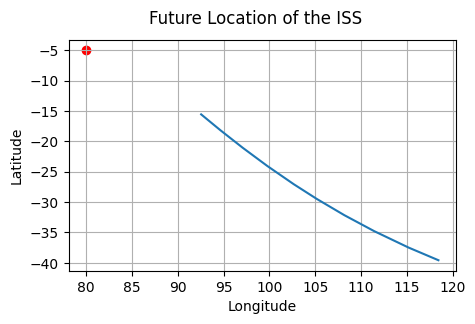

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([80], [predicted_latitude], color='red')

this gives very approximate value because this model requires a bigger data set. That is why we will try predicting again using - Polynomial Regression.

//Also the present data is not linear in nature. Hence Polynomial is better to use.

In [ ]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

predicted_latitude =  poly_regression(80)

print('Next predicted point:', predicted_latitude)

Next predicted point: 2.8878588959256604


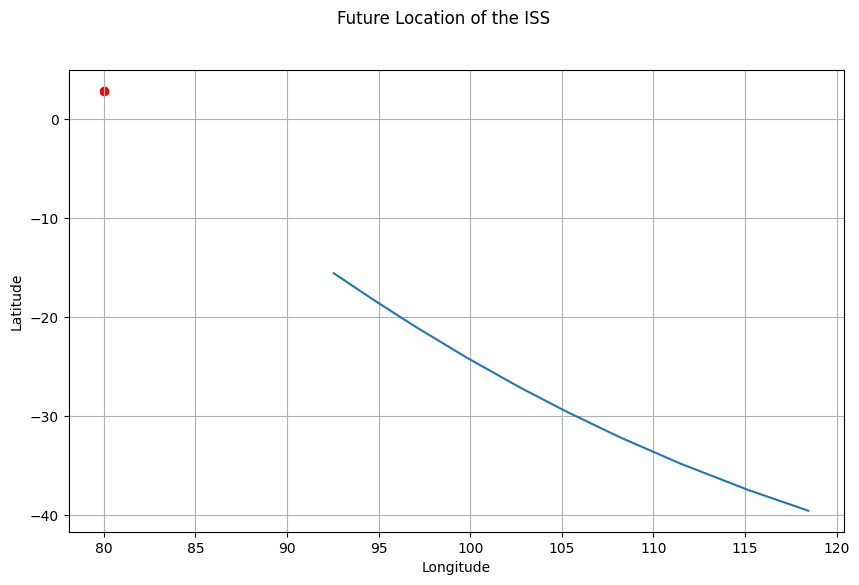

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([80], [predicted_latitude], color='red')

Predicted point 1: Longitude: 119.4556, Latitude: -40.06256808893238
Predicted point 2: Longitude: 120.4556, Latitude: -40.57269159068562
Predicted point 3: Longitude: 121.4556, Latitude: -41.05065701420983
Predicted point 4: Longitude: 122.4556, Latitude: -41.49610646273615
Predicted point 5: Longitude: 123.4556, Latitude: -41.9086820394956
Predicted point 6: Longitude: 124.4556, Latitude: -42.288025847719325
Predicted point 7: Longitude: 125.4556, Latitude: -42.633779990638374
Predicted point 8: Longitude: 126.4556, Latitude: -42.94558657148386
Predicted point 9: Longitude: 127.4556, Latitude: -43.22308769348686
Predicted point 10: Longitude: 128.4556, Latitude: -43.46592545987849


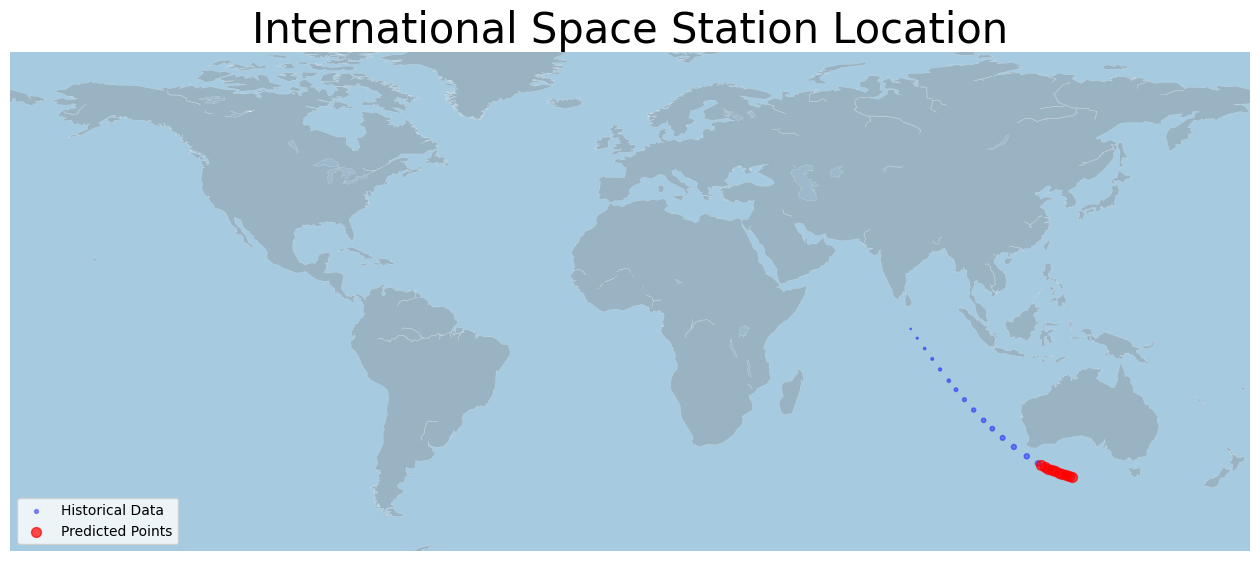

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap

# Load historical data (assuming you have a file 'ISS_location_20240618092416.csv')
iss_flight_record = pd.read_csv('ISS_location_20240618092416.csv')

# Translate timestamp into readable date-time
iss_flight_record['date'] = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']]

# Add an index column
iss_flight_record['index'] = range(1, len(iss_flight_record) + 1)

# Fit polynomial regression model
x = iss_flight_record['longitude']
y = iss_flight_record['latitude']

degree = 3  # Degree of the polynomial
poly_coeff = np.polyfit(x, y, degree)
poly_regression = np.poly1d(poly_coeff)

# Predict the next 10 points
current_longitude = x.iloc[-1]  # Start from the last known longitude
step = 1  # Define the step size for longitude (this could be adjusted based on the ISS speed and sampling rate)
predicted_points = []

for i in range(1, 11):
    next_longitude = current_longitude + i * step
    next_latitude = poly_regression(next_longitude)
    predicted_points.append((next_longitude, next_latitude))

# Print the next 10 predicted points
for idx, (lon, lat) in enumerate(predicted_points, 1):
    print(f'Predicted point {idx}: Longitude: {lon}, Latitude: {lat}')

# Visualization
plt.figure(figsize=(16, 8))

# Make the background map
m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Plot historical data
m.scatter(iss_flight_record['longitude'], iss_flight_record['latitude'], s=iss_flight_record['index'], alpha=0.4, color='blue', label='Historical Data')

# Plot predicted points
predicted_longitudes, predicted_latitudes = zip(*predicted_points)
m.scatter(predicted_longitudes, predicted_latitudes, s=50, alpha=0.7, color='red', label='Predicted Points')

plt.title('International Space Station Location', fontsize=30)
plt.legend()
plt.show()
